In [332]:
import numpy as np

import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import colors


In [333]:
# Lab environment
ppl = np.zeros((50,50), dtype=int)
ppl[0:49][0] = 2

day = 0


In [334]:
def everyone_is_immune():
    for index in np.ndindex(ppl.shape):
        if ppl[index[0]][index[1]] !=6:
            return False
    return True

def contact():
    for index in np.ndindex(ppl.shape):
        h_person = ppl[index[0]][index[1]]
        '''
            ¤ After a person has been contagious for 4 days, then the person is
            non-contagious and cannot spread the virus nor can the person
            get the virus again due to immunity.
        '''
        if h_person> 0 and h_person <6:
            ppl[index[0]][index[1]] += 1

        if h_person >= 6:
            pass

        if h_person == 0:
            '''
                ¤ Each day, a healthy person comes in contact with 4 random
                people. If any of those random people is contagious, then the
                healthy person becomes infected.
            '''
            for i in range(4):
                    x = np.random.randint(50)
                    y = np.random.randint(50)
                    '''
                        ¤ It takes one day for the infected person to become contagious.
                    '''
                    if ppl[x][y] >= 2 and ppl[x][y]<6 : # if contacted person is contagious
                        ppl[index[0]][index[1]] = 1 #infected

# Plotting and animating
def update_figure(*args):
    global day
    contact()
    if everyone_is_immune():
        print("The whole population is now Immune. The number of days: {0}".format(day))
        exit()
    day += 1
    # updating the image
    im.set_array(ppl)
    return im,

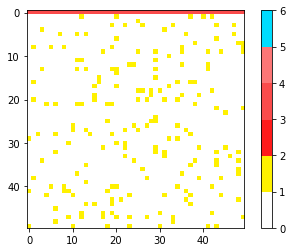

In [335]:
custom_cmap = colors.ListedColormap(['w', '#FFF100', '#FF1B1B', '#FA4B4B', '#FC7676', '#FBAEAE', '#00DDFF'])
cmap_index = [0, 1, 2, 3, 4, 5, 6]
norm = colors.BoundaryNorm(cmap_index, custom_cmap.N)


fig = plt.figure()
im = plt.imshow(ppl, animated=True, cmap=custom_cmap, norm=norm)
plt.colorbar()
ani = animation.FuncAnimation(fig, update_figure, interval=1000, blit=True)
plt.show()
